In [39]:
#Tutorial with the 2020 Alaskan Earthquake in July
import obspy
from obspy.clients.fdsn import Client
client = Client("IRIS")

11 Event(s) in Catalog:
2020-07-28T08:03:44.140000Z | +54.867, -161.144 | 6.1 Mww
2020-07-26T00:53:59.067000Z | -60.781,  -25.405 | 6.4 mww
2020-07-22T20:07:19.183000Z | +33.146,  +86.867 | 6.3 mww
2020-07-22T06:16:18.657000Z | +54.932, -159.042 | 6.1 mb
2020-07-22T06:12:44.593000Z | +55.030, -158.522 | 7.8 Mww
2020-07-21T20:56:25.167000Z | -20.805, -178.632 | 6.0 mww
2020-07-18T15:32:37.220000Z | -15.246, -172.698 | 6.1 Mww
2020-07-17T14:03:42.083000Z | +11.984,  +94.888 | 6.1 mww
2020-07-17T02:50:22.162000Z |  -7.839, +147.775 | 7.0 mww
2020-07-06T22:54:47.897000Z |  -5.596, +110.695 | 6.7 Mww
2020-07-06T18:16:18.408000Z | +12.079, +140.246 | 6.2 mww


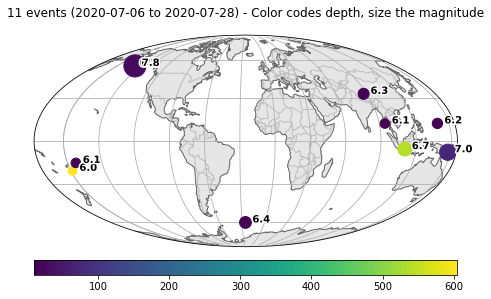

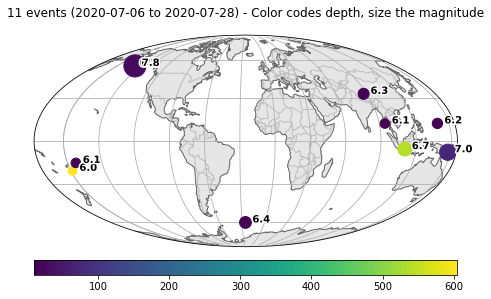

In [48]:
#Catalogueing events for the Alaska event
starttime=("2020-07-01")
endtime=("2020-07-31")
cat = client.get_events(starttime=starttime, endtime=endtime, minmagnitude=6)
print(cat.__str__(print_all=True))
cat.plot()

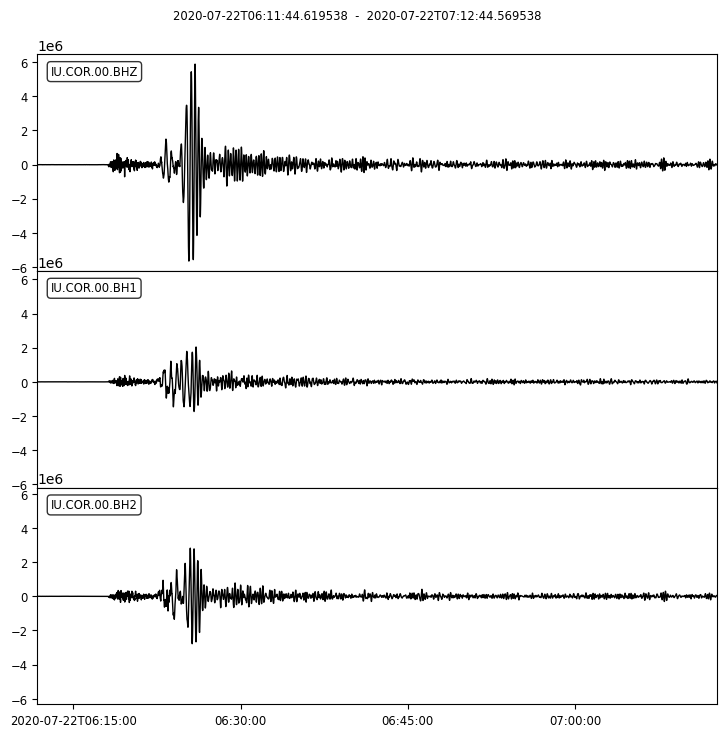

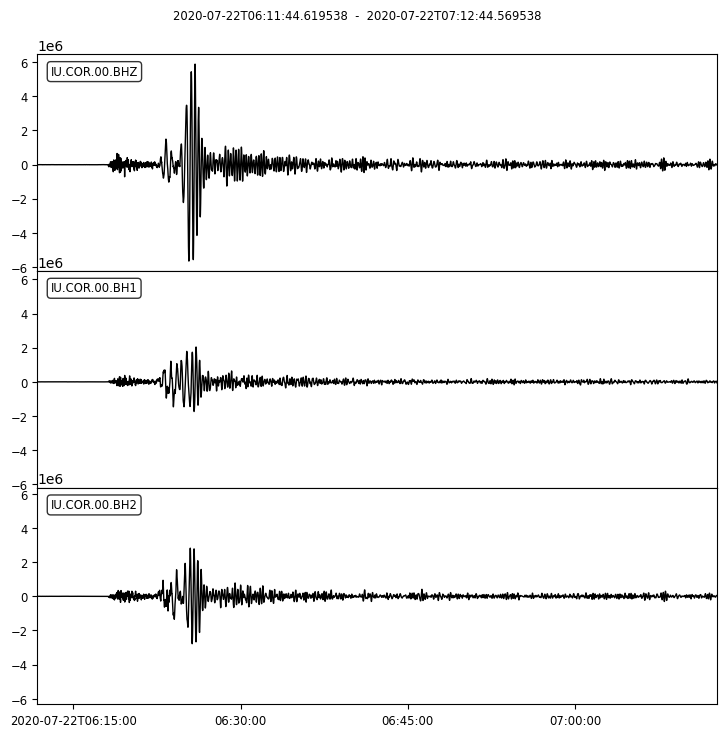

In [35]:
#M 7.8 - 100 km SSE of Perryville, Alaska; Depth: 28km depth
#Network IU, Seismogram in Corvallis, Oregon, USA, elevation:110m
from obspy import UTCDateTime
t = UTCDateTime("2020-07-22T06:12:44.593000Z")
st = client.get_waveforms('IU','COR','00','BH?',starttime=t-60, endtime=t+60*60)
st.plot()

In [73]:
#Place station data in inventory and calling the coordinates from it
inv= client.get_stations(network="IU", station="COR", level="response")
coords = inv.get_coordinates("IU.COR.00.BHZ")
print(coords)

{'latitude': 44.5855, 'longitude': -123.3046, 'elevation': 110.0, 'local_depth': 0.0}


C:\Users\Carl\Anaconda3\envs\obspy\lib\site-packages\obspy\core\inventory\network.py:324: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


In [50]:
#Source coordinates
from obspy.geodetics import locations2degrees

origin = cat[4].preferred_origin()
distance = locations2degrees(origin.latitude, origin.longitude,
                            coords["latitude"], coords["longitude"])
print(distance)

24.6709468711


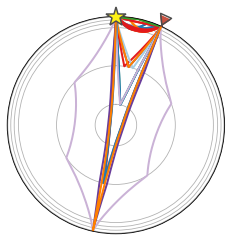

In [77]:
#Ray Paths of the event
from obspy.taup import TauPyModel

m = TauPyModel(model="ak135")

arrivals = m.get_ray_paths(
    distance_in_degree=distance,
    source_depth_in_km=origin.depth/1000)
arrivals.plot_rays();


2020-07-22T06:18:12.275716Z


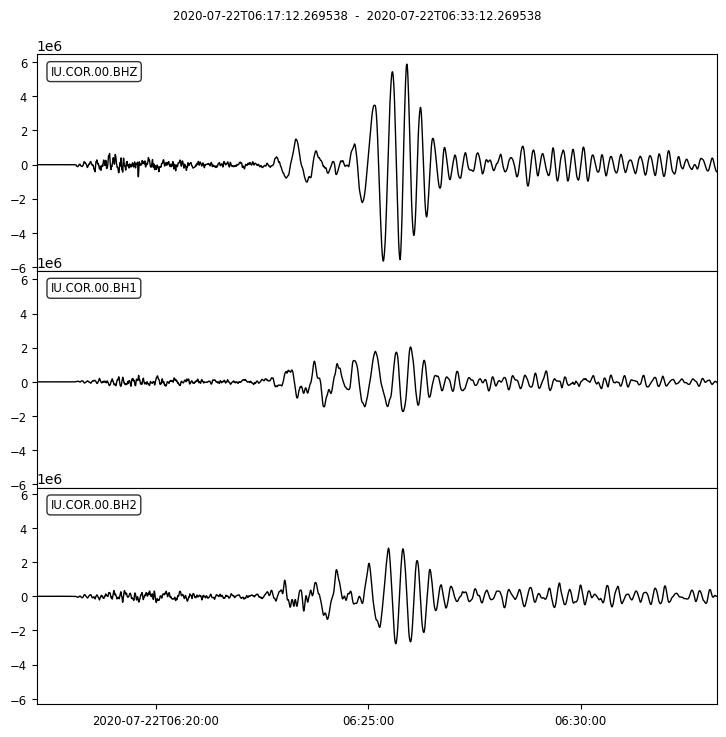

In [57]:
first_arrival= origin.time + arrivals[4].time
print(first_arrival)

st2 = st.slice(first_arrival - 60, first_arrival + 900)
st2.plot();

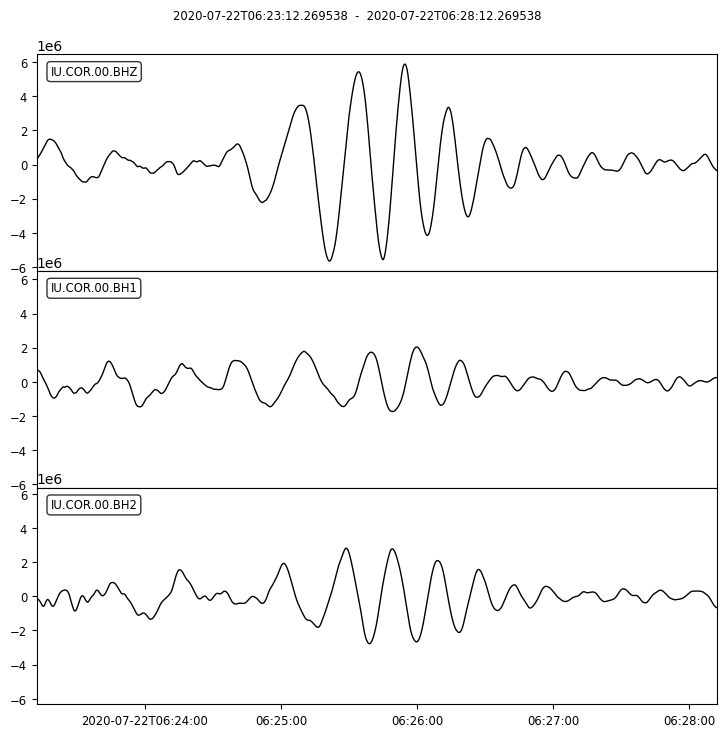

In [58]:

st3=st.slice(first_arrival + 300, first_arrival + 600)
st3.plot();

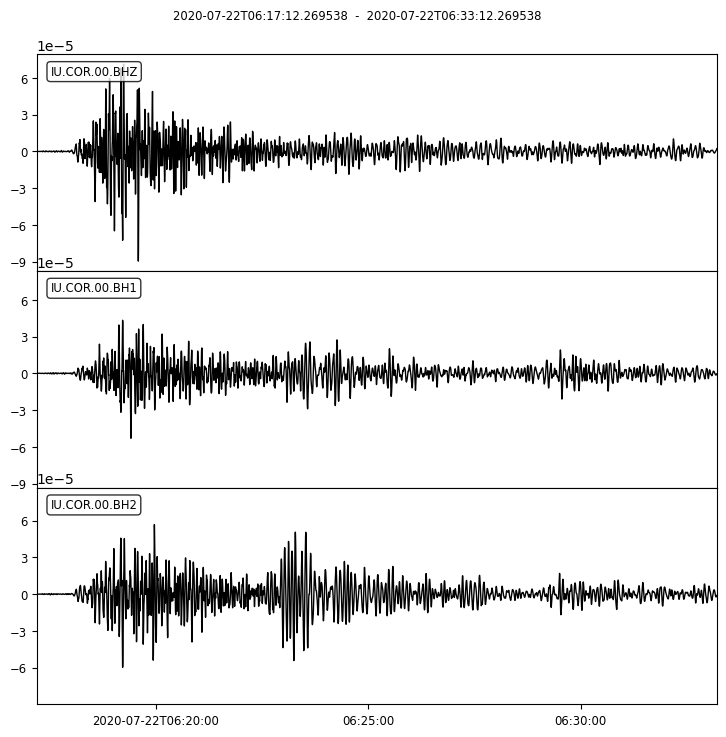

In [59]:
st4 = st2.copy()

st4.attach_response(inv)
st4.remove_response(pre_filt=(1.0/10.0, 1.0/ 5.0, 1.0, 2.0), output="VEL")
st4.plot();

In [86]:
#Interactive widget from tutorial
#not working raypath data is missing to calculate difference
from IPython.html.widgets import interact
from obspy.taup import TauPyModel

m=TauPyModel("ak135")

def plot_raypaths(distance, depth, wavetype):
    try:
        plt.close()
    except:
        pass
    if wavetype == "all":
        phases = ["ttall"]
    elif wavetype == "diff":
        phases = ["Pdiff", "pPdiff"]
    m.get_ray_paths(distance_in_degree=distance,
                   source_depth_in_km=depth,
                   phase_list=phases).plot();
    
interact(plot_raypaths, distance=[0, 180],
        depth=[0,700], wavetype=["all", "diff"])

interactive(children=(Dropdown(description='distance', options=(0, 180), value=0), Dropdown(description='depth…

<function __main__.plot_raypaths(distance, depth, wavetype)>